# Atlas notebooks

***

> This notebook reproduces and extends parts of the figures and products of the AR6-WGI Atlas. It is part of a notebook collection available at https://github.com/IPCC-WG1/Atlas for reproducibility and reusability purposes. This work is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).
>
> ![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

## Using the 4th version of the IPCC WGI reference regions in R

30/6/2021

**M. Iturbide** ([Santander Meteorology Group](http://www.meteo.unican.es). Institute of Physics of Cantabria. CSIC-University of Cantabria, Santander, Spain)

`IPCC-WGI-reference-regions-v4` is the new set of reference regions that update the IPCC AR5 reference regions (http://www.ipcc-data.org/guidelines/pages/ar5_regions.html) for reporting sub-continental climate information (e.g. CMIP6 projections). This tutorial shows how the standard R packages for spatial data can be used to manipulate and plot these regions, and how these capabilities can be further extended for climate data processing using the `climate4R` framework (https://github.com/SantanderMetGroup/climate4R, Iturbide _et al._, 2019). 


### Requirements:

The following R packages are used to work with spatial data:

 - rgdal (Bivand et al., 2018): https://cran.r-project.org/web/packages/rgdal/index.html
 - sp (Bivand et al., 2013): https://cran.r-project.org/web/packages/sp/index.html
 - RColorBrewer (Neuwirth, 2014): https://cran.r-project.org/web/packages/RColorBrewer/index.html
 
and the `climate4R` components used to load, analyse and visualize climate data:
 
 - loadeR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/loadeR/wiki
 - visualizeR (Frías et al. 2018): https://github.com/SantanderMetGroup/visualizeR
 - transformeR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/transformeR
 - geoprocessoR (Iturbide et al., 2019): https://github.com/SantanderMetGroup/geoprocessoR

In [48]:
# Package installation for spatial analysis
# install.packages("rgdal")
# install.packages("sp")
# install.packages("RColorBrewer") # color palettes

In [1]:
# and loading
library(rgdal)
library(sp)
library(RColorBrewer)

Loading required package: sp

rgdal: version: 1.5-16, (SVN revision 1050)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.2, released 2021/03/05
Path to GDAL shared files: /home/juaco/miniconda3/envs/atlas/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 8.0.0, March 1st, 2021, [PJ_VERSION: 800]
Path to PROJ shared files: /home/juaco/miniconda3/envs/atlas/share/proj
PROJ CDN enabled: TRUE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.



The climate4R packages can be installed directly from their respective GitHub repositories using the inatll_githun . Further instalation details and options, including a conda recipe are available in the [climate4R main repo](https://github.com/SantanderMetGroup/climate4R).

In [50]:
#install.packages("devtools") # to install packages from GitHub
# library(devtools)
# install_github(c("SantanderMetGroup/loadeR.java",
#                  "SantanderMetGroup/loadeR",
#                  "SantanderMetGroup/transformeR",
#                  "SantanderMetGroup/visualizeR",
#                  "SantanderMetGroup/geoprocessoR"))

### Using the updated IPCC regions:

#### Import the reference regions:

**From shapefile**: the shapefile of `IPCC-WGI-reference-regions-v4` is available for download at the [ATLAS GitHub repository](https://github.com/IPCC-WG1/Atlas), within the `reference-regions` subdirectory stored within a _.zip_ file (shapefiles are constituted by a number of complementary files storing geo-reference information, geometries, the associated database etc.). In this example, we first extract the _zip_ contents into a temporary directory for data import.

Function `readOGR` from package `rgdal` reads shapefiles into the R environment.

In [2]:
tmpdir <- tempdir()
unzip("../reference-regions/IPCC-WGI-reference-regions-v4_shapefile.zip", exdir = tmpdir)
refregions <- readOGR(dsn = tmpdir, layer = "IPCC-WGI-reference-regions-v4")

OGR data source with driver: ESRI Shapefile 
Source: "/tmp/RtmpGl5xtP", layer: "IPCC-WGI-reference-regions-v4"
with 58 features
It has 4 fields


 The R object that is obtained is a `SpatialPolygonsDataFrame`, this is a `Spatial*` class object from package `sp`.

In [3]:
class(refregions)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

 - **From R object**: the `refregions` R object is also available in the same repo directory, thus, the Spatial object of the regions can be directly loaded into R as follows:

In [4]:
load("../reference-regions/IPCC-WGI-reference-regions-v4_R.rda", verbose = TRUE)

Loading objects:
  IPCC_WGI_reference_regions_v4


We can simplify this object by converting it to a `SpatialPolygons` class object (i.e., only the polygons are retained and their attributes discarded): 

In [5]:
refregions <- as(IPCC_WGI_reference_regions_v4, "SpatialPolygons")

### Plotting regions:

We can use function `plot` to visualize the regions:

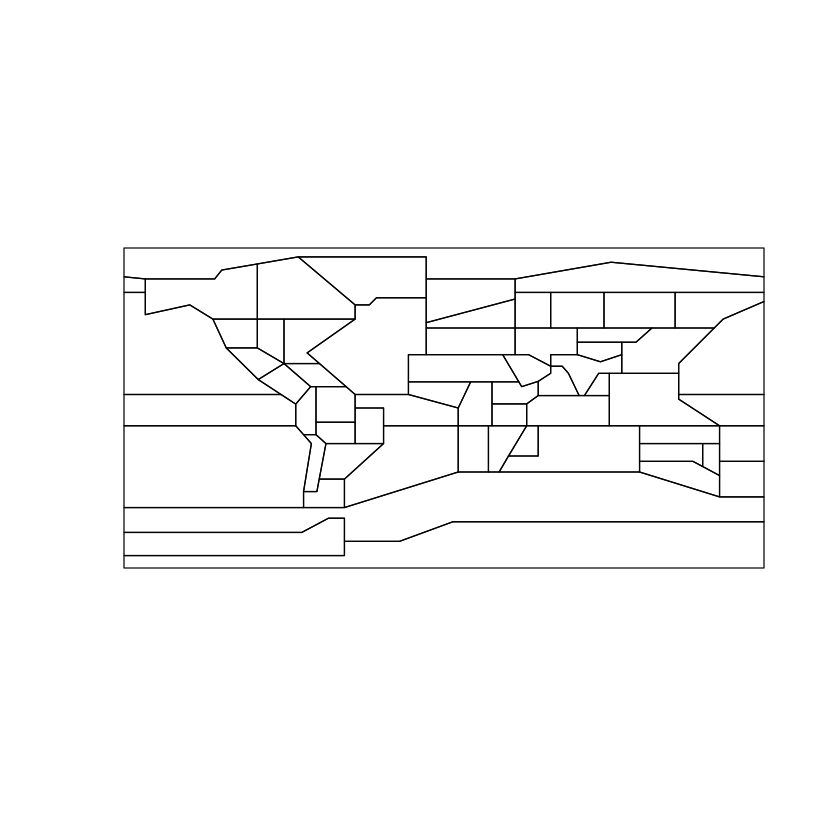

In [6]:
plot(refregions)

The R basic plotting functions allow adding layers to the plot. Here the region names and coastline are added. Shapefiles such as global coastlines and other physical features or administrative boundaries can be either read from local or obtained from the Internet. In this example, a world coastline layer is used from the [Natural Earth](https://www.naturalearthdata.com) public repository of digital cartography.

***
_(begin example)_


An example follows on how to download and load the vector layer. However, note that **this step can be skipped** and read the layer directly from the `auxiliary-material` subdir.

The target vector layer (_shapefile_ format) is next downloaded from Natural Earth download site to a temporary file and extracted:

In [52]:
temp.dir <- tempdir()
zipfile <- file.path(temp.dir, "world.zip")
download.file(url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/physical/ne_110m_coastline.zip",
              destfile = zipfile)
unzip(zipfile, exdir = temp.dir)

and next imported into R:

In [7]:
coastLines <- readOGR(dsn = temp.dir, layer = "ne_110m_coastline")

ERROR: Error in stopifnot(is.character(dsn)): object 'temp.dir' not found


In [ ]:
plot(coastLines)


_(End of example)_
***

However, for better reproducibility, the vector layer is already stored in the `auxiliary-material` subdirectory:

In [8]:
coastLines <- readOGR(dsn = "./auxiliary-material/", layer = "WORLD_coastline")

OGR data source with driver: ESRI Shapefile 
Source: "/home/juaco/workspace/gitRepo/IPCC-WG1_Atlas/notebooks/auxiliary-material", layer: "WORLD_coastline"
with 127 features
It has 2 fields


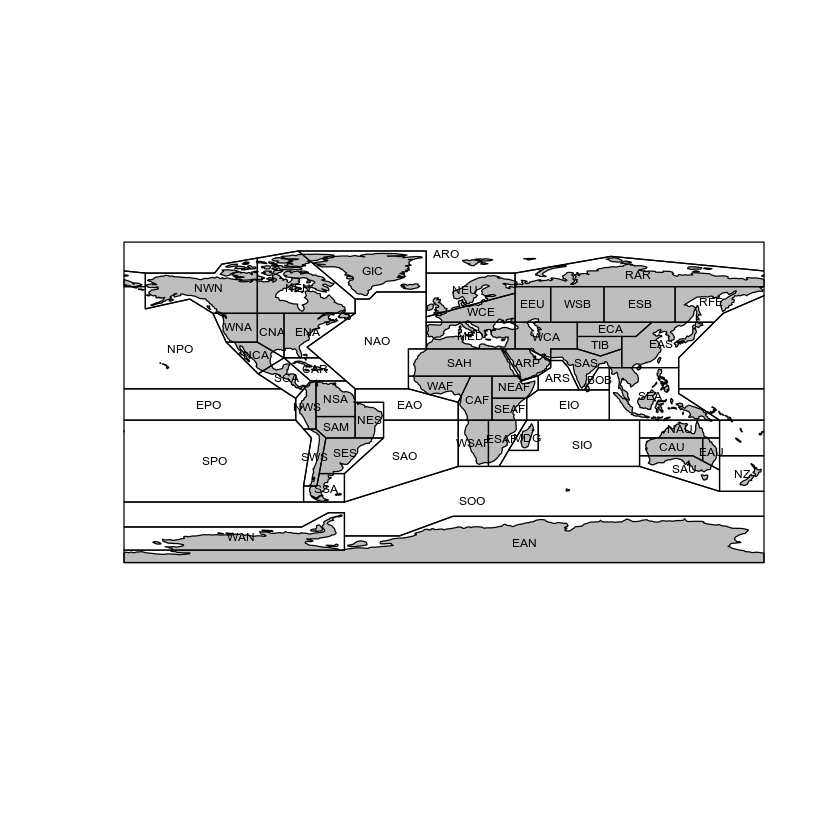

In [9]:
plot(coastLines, col = "grey")
plot(refregions, add = TRUE)
text(x = coordinates(refregions)[ ,1],
     y = coordinates(refregions)[ ,2],
     labels = names(refregions), cex = 0.6)

#### Selecting specific regions

The IDs of all regions can be inspected for easy subsetting:

In [10]:
names(refregions)

GIC    NWN    NEN    WNA    CNA    ENA    NCA    SCA    CAR    NWS    NSA 
 "GIC"  "NWN"  "NEN"  "WNA"  "CNA"  "ENA"  "NCA"  "SCA"  "CAR"  "NWS"  "NSA" 
   NES    SAM    SWS    SES    SSA    NEU    WCE    EEU    MED    SAH    WAF 
 "NES"  "SAM"  "SWS"  "SES"  "SSA"  "NEU"  "WCE"  "EEU"  "MED"  "SAH"  "WAF" 
   CAF   NEAF   SEAF   WSAF   ESAF    MDG    RAR    WSB    ESB    RFE    WCA 
 "CAF" "NEAF" "SEAF" "WSAF" "ESAF"  "MDG"  "RAR"  "WSB"  "ESB"  "RFE"  "WCA" 
   ECA    TIB    EAS    ARP    SAS    SEA    NAU    CAU    EAU    SAU     NZ 
 "ECA"  "TIB"  "EAS"  "ARP"  "SAS"  "SEA"  "NAU"  "CAU"  "EAU"  "SAU"   "NZ" 
   EAN    WAN    ARO    NPO    EPO    SPO    NAO    EAO    SAO    ARS    BOB 
 "EAN"  "WAN"  "ARO"  "NPO"  "EPO"  "SPO"  "NAO"  "EAO"  "SAO"  "ARS"  "BOB" 
   EIO    SIO    SOO 
 "EIO"  "SIO"  "SOO"

For instance, in order to extract one single region (e.g., New Zealand, NZ):

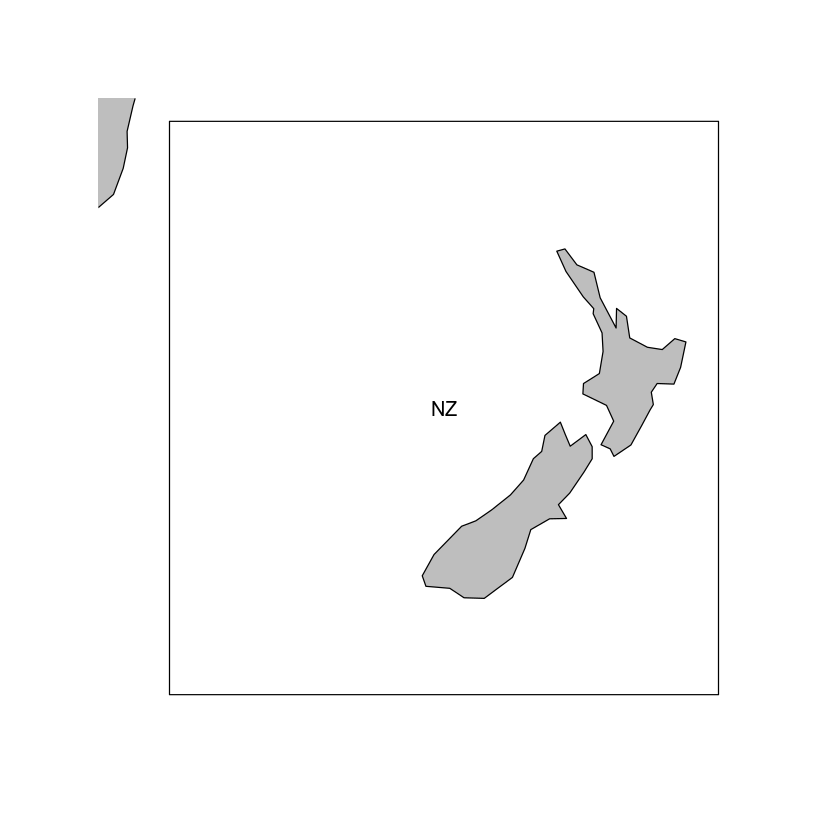

In [11]:
newzealand <- refregions["NZ"]
plot(newzealand)
plot(coastLines, col = "grey", add = TRUE)
text(x = coordinates(newzealand)[,1],
     y = coordinates(newzealand)[,2],
     labels = names(newzealand), cex = 1)

or several regions:

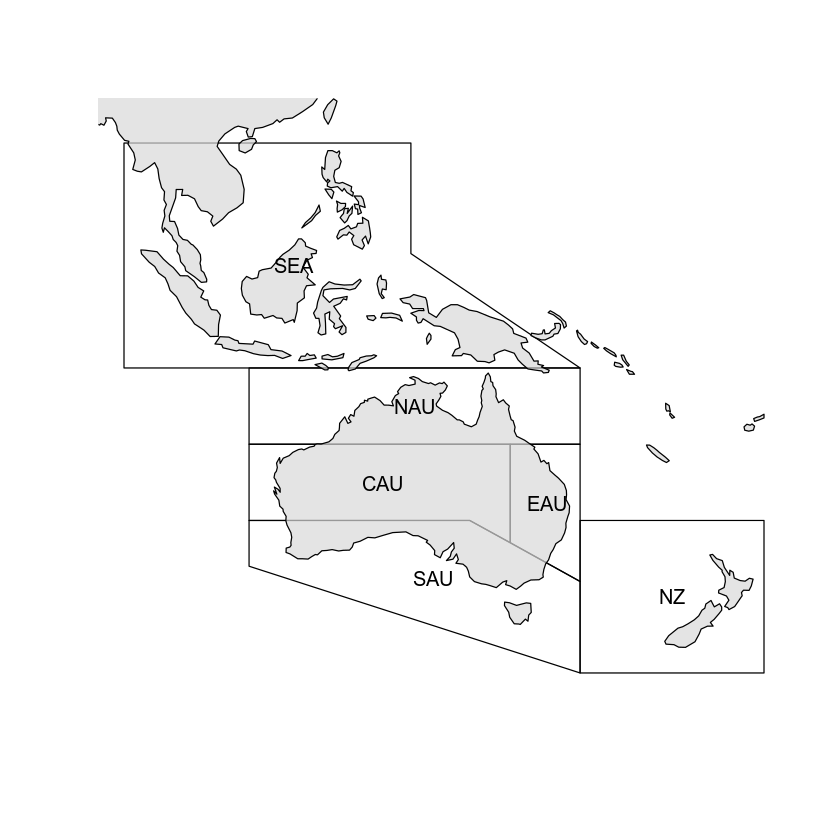

In [12]:
australasia <- refregions[c("NZ", "SEA", "NAU", "CAU", "EAU", "SAU")]

plot(australasia)
plot(coastLines, col = rgb(0.85,0.85,0.85,0.7), add = TRUE)
text(x = coordinates(australasia)[,1],
    y = coordinates(australasia)[,2],
    labels = names(australasia), cex = 1)

### Example:

In this example we will consider a NetCDF file with historical temperature simulations and show several analysis and visualizations at a global scale or filtering by regions. To this aim, we load using `climate4R` an example dataset corresponding to the following ESGF request: 
 - MIP Era: CMIP6
 - Source ID: CESM2
 - Experiment ID: historical
 - Variant Label: r1i1p1f1
 - Table ID: Amon
 - Frequency: mon
 - Variable: tas 

In this case, functions `dataInventory` and `loadGridData` (package `loadeR`) are used. First we need to install the `climate4R` framework (**conda** and **docker** installations available at https://github.com/SantanderMetGroup/ATLAS).

In [13]:
library(transformeR)
library(loadeR)
library(visualizeR)
library(geoprocessoR)


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



transformeR version 2.1.2 (2021-06-22) is loaded

Please see 'citation("transformeR")' to cite this package.

Loading required package: rJava

Loading required package: loadeR.java

Java version 11x amd64 by Oracle Corporation detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready

Loading required package: climate4R.UDG

climate4R.UDG version 0.2.0 (2020-07-31) is loaded


Get the latest stable version (0.2.3) using <devtools::install_github('SantanderMetGroup/climate4R.UDG')>

Please use 'citation("climate4R.UDG")' to cite this package.

loadeR version 1.7.1 (2021-07-05) is loaded

Please use 'citation("loadeR")' to cite this package.

visualizeR version 1.6.1 (2021-03-11) is loaded

Please see 'citation("visualizeR")' to cite this package.

geoprocessoR version 0.2.0 (2020-01-06) is loaded

Please see 'citation("geoprocessoR")' to cite this package.



First, `dataInventory` provides basic information about the variables available in the file/dataset:  

In [ ]:
di <- dataInventory("./auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc")
str(di)

As we can see from the inventory output, it contains a single variable ('tas', 2 meters air temperature). To load this data, the function `loadGridData` from package `loadeR` is used:

In [14]:
grid1 <- loadGridData(dataset = "./auxiliary-material/CMIP6Amon_tas_CanESM5_r1i1p1f1_historical_gn_185001-201412.nc",
                      var = "tas")

[2021-07-08 08:52:08] Defining geo-location parameters

[2021-07-08 08:52:08] Defining time selection parameters

[2021-07-08 08:52:08] Retrieving data subset ...

[2021-07-08 08:52:16] Done



The example data is the temperature field for the period 1850-2014. In order to plot the first time step, we extract the data for January 1850 with the function `subsetGrid` (package `transformeR`):

In [18]:
grid185001 <- subsetGrid(grid1, years = 1850, season = 1, drop = TRUE)

`spatialPlot` from package `visualizeR` is the main map plotting function in `climate4R`. It is a wrapper of the powerful `spplot` method from package `sp`, thus accepting all possible optional parameters from lattice graphics. In addition, it also incorporates some additional arguments for straightforward fulfillment of commonplace requirements in climate data visualization (e.g. `backdrop.theme`, `set.min`, `set.max`, `lonCenter`, `color.theme`, `rev.colors` etc.).

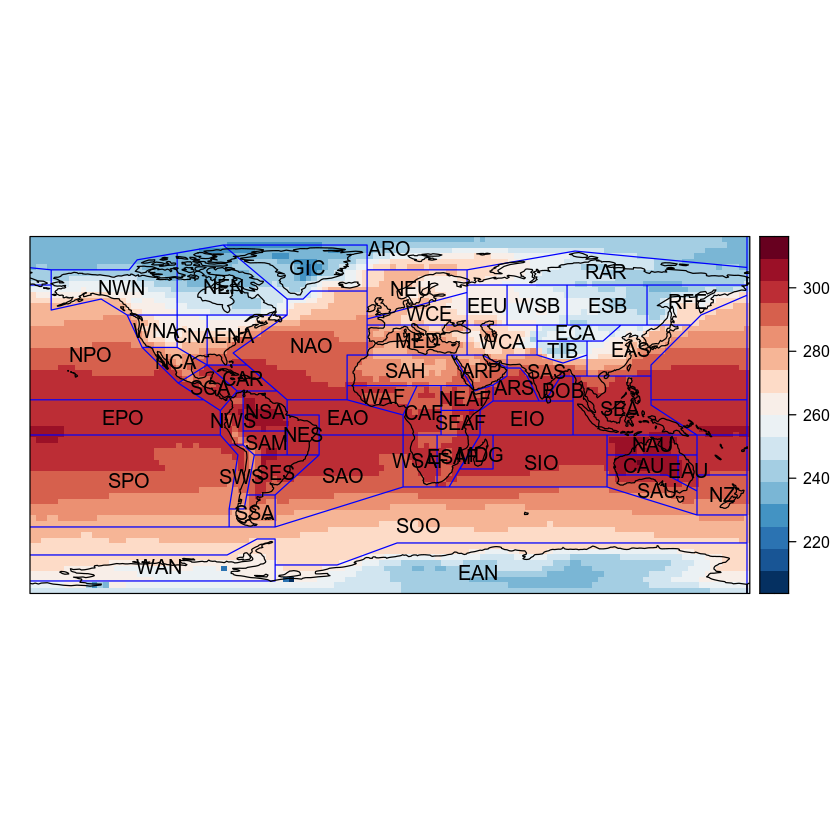

In [19]:
regnameslayer <- list("sp.text", coordinates(refregions), names(refregions))
spatialPlot(grid185001, backdrop.theme = "coastline", 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(list(refregions, first = FALSE, col = "blue"), regnameslayer))

#### Extracting data for the region/s of interest

Function `overGrid` perfoms the operation of intersecting a climate4R grid and a Spatial object. The only requirement is equal projections. Use function `projectGrid` to define and/or change the projection of a grid. Use `proj4string` and `spTransform` for Spatial objects. In this example the map projection is WGS84 (EPSG:4326). Note that several warning messages may appear during the following operations. These arise from recent changes in the versions of PROJ and GDAL, and can be safely ignored throughout these examples.

In [20]:
proj4string(refregions)

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”


[1] "+proj=longlat +ellps=WGS84 +no_defs"

An appropriate definition of the current coordinates projection will be later needed to ensure spatial consistency of geospatial operations:

In [21]:
grid185001 <- setGridProj(grid = grid185001, proj = proj4string(refregions))

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”


Once the spatial reference is defined, the spatial overlay is done:

In [22]:
grid1.au <- overGrid(grid185001, australasia)

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


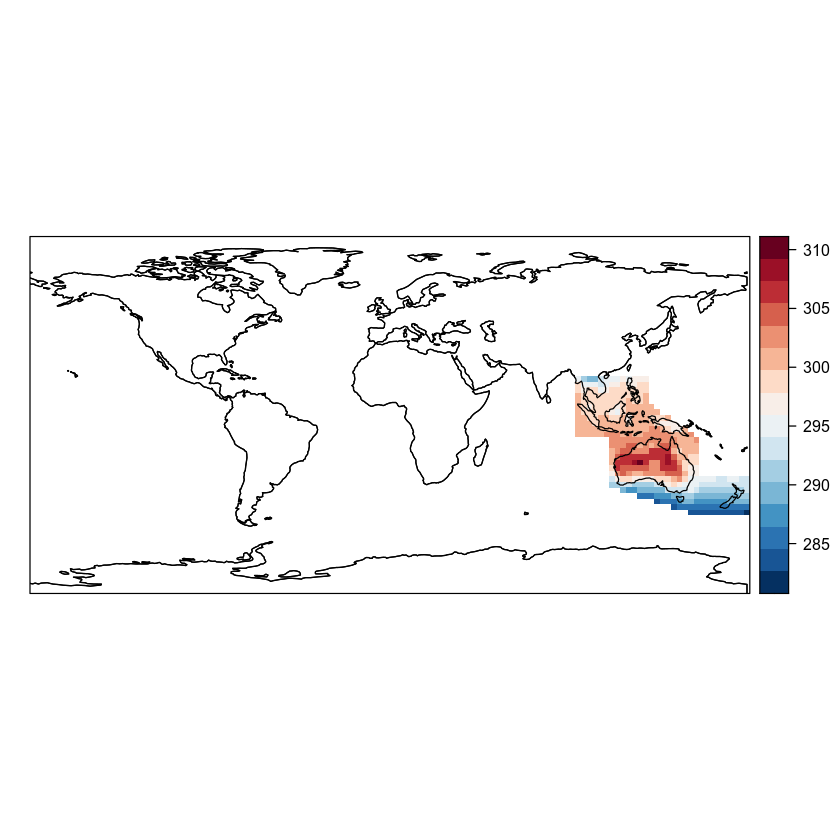

In [23]:
spatialPlot(grid1.au, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

Setting the argument `subset = TRUE` the spatial object id cropped to the region extent:

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”


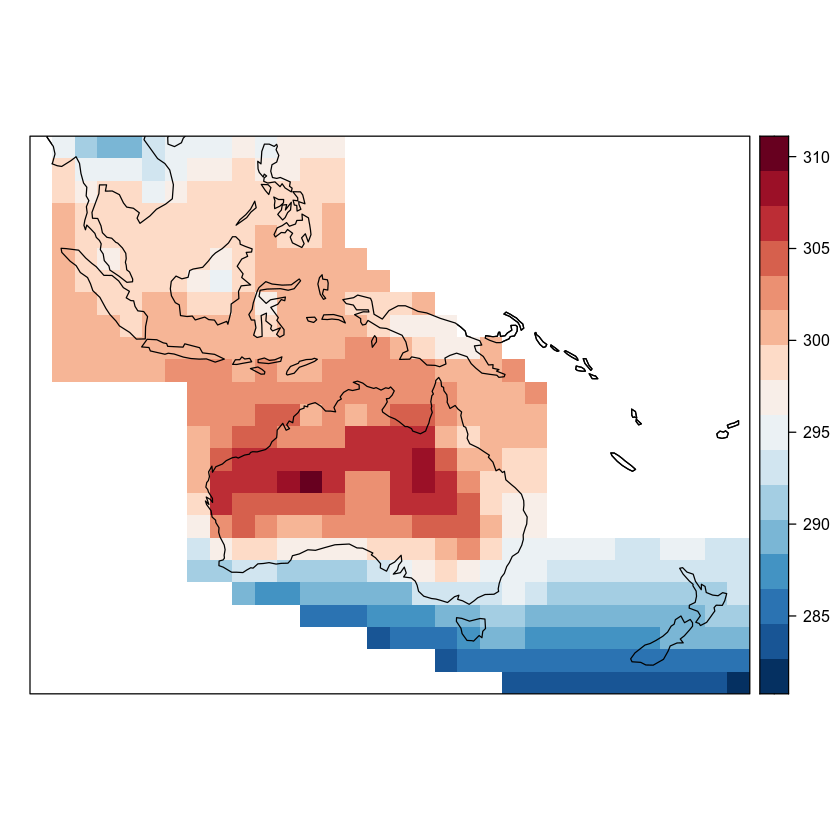

In [24]:
grid1.au <- overGrid(grid185001, australasia, subset = TRUE)
spatialPlot(grid1.au, 
            color.theme = "RdBu",
            rev.colors = TRUE,
            sp.layout = list(coastLines, first = FALSE, col = "black"))

Let’s calculate the regional average and visualize the yearly time series with `temporalPlot`:

Warning message in proj4string(refregions):
“CRS object has comment, which is lost in output”
Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”
Warning message in projectGrid(grid1, original.CRS = proj4string(refregions)):
“CAUTION! Grid with previusly defined projection: LatLonProjection”
[2021-07-08 08:54:29] Arguments of the original projection defined as +proj=longlat +ellps=WGS84 +no_defs

Warning message in showSRID(uprojargs, format = "PROJ", multiline = "NO"):
“Discarded datum Unknown based on WGS84 ellipsoid in CRS definition”
[2021-07-08 08:54:34] Performing annual aggregation...

[2021-07-08 08:54:40] Done.

pad applied on the interval: year



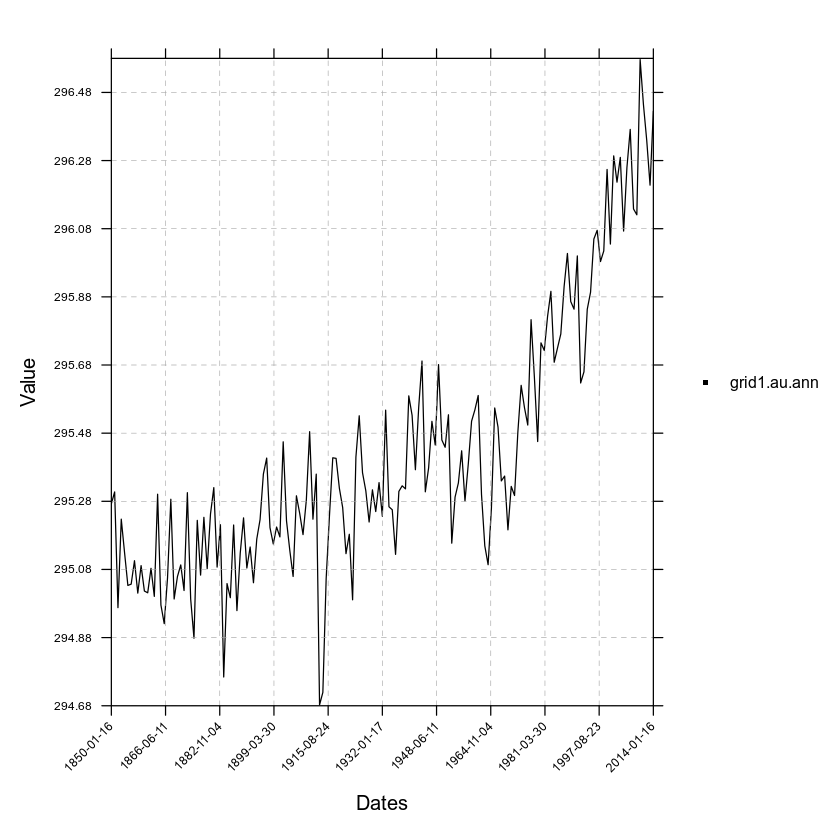

In [25]:
grid1 <- projectGrid(grid1, original.CRS = proj4string(refregions))
grid1.au <- overGrid(grid1, australasia)
grid1.au.ann <- aggregateGrid(grid1.au, aggr.y = list(FUN = "mean", na.rm = TRUE))
temporalPlot(grid1.au.ann, aggr.spatial = list(FUN = "mean", na.rm = TRUE))

### References

Bivand R.S., Pebesma E.J., Gomez-Rubio V. (2013). Applied spatial data analysis with R, Second edition. Springer, NY. http://www.asdar-book.org/

Bivand R.S., Keitt T., Rowlingson B. (2018). rgdal: Bindings for the ‘Geospatial’ Data Abstraction Library. R package version 1.3-6. https://CRAN.R-project.org/package=rgdal

Frías M.D., Iturbide M., Manzanas R., Bedia J., Fernández J., Herrera S., Cofiño A.S., Gutiérrez J.M. (2018). An R package to visualize and communicate uncertainty in seasonal climate prediction. Environmental Modelling and Software, 99, 101-110, http://doi.org/10.1016/j.envsoft.2017.09.008

Iturbide M., Bedia J., Herrera S., Baño-Medina J., Fernández J., Frías M., Manzanas R., San-Martín D., Cimadevilla E., Cofiño A., Gutiérrez J. (2019). The R-based climate4R open framework for reproducible climate data access and post-processing. Environmental Modelling & Software. doi: https://doi.org/10.1016/j.envsoft.2018.09.009

Neuwirth E. (2014). RColorBrewer: ColorBrewer Palettes. R package version 1.1-2. https://CRAN.R-project.org/package=RColorBrewer

Sarkar D. (2008) Lattice: Multivariate Data Visualization with R. Springer, NY. ISBN 978-0-387-75968-5

### Session information

In [75]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /home/juaco/miniconda3/envs/atlas/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8          LC_NUMERIC=C                 
 [3] LC_TIME=es_ES.UTF-8           LC_COLLATE=en_US.UTF-8       
 [5] LC_MONETARY=es_ES.UTF-8       LC_MESSAGES=en_US.UTF-8      
 [7] LC_PAPER=es_ES.UTF-8          LC_NAME=es_ES.UTF-8          
 [9] LC_ADDRESS=es_ES.UTF-8        LC_TELEPHONE=es_ES.UTF-8     
[11] LC_MEASUREMENT=es_ES.UTF-8    LC_IDENTIFICATION=es_ES.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] geoprocessoR_0.2.0  visualizeR_1.6.1    loadeR_1.7.1       
 [4] climate4R.UDG_0.2.0 loadeR.java_1.1.1   rJava_1.0-4        
 [7] transformeR_2.1.2   RColorBrewer_1.1-2  rgdal_1.5-16       
[10] sp_1.4-5            jsonlite_1.7.2      formatR_1.11       

loaded vi